#importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
% matplotlib inline
pd.options.display.max_rows = 300
dataFrame1 = pd.read_csv('Data/file1.csv')
dataFrame2 = pd.read_csv('Data/file2.csv')
dataFrame3 = pd.read_csv('Data/file3.csv')
dataframe4_import = pd.read_csv('../../data/Data_Marketing_Customer_Analysis_Round3.csv')


In [2]:

pattern = re.compile(r"^(?:\\.|[^/\\])*/((?:\\.|[^/\\])*)/")

columns_options = {'ST': 'state',
                   'State': 'state',
                   'Gender': 'gender',
                   'GENDER': 'gender'}

state_replacing_options = {'California': 'West Region',
                           'Oregon': 'North West',
                           'Washington': 'East',
                           'Nevada': 'Central',
                           'Arizona': 'Central'}

dataFrame1.rename(columns=columns_options,
                  inplace=True, errors='ignore')

dataFrame2.rename(columns=columns_options,
                  inplace=True, errors='ignore')

dataFrame3.rename(columns=columns_options,
                  inplace=True, errors='ignore')

dataFrame = pd.concat([dataFrame1, dataFrame2, dataFrame3], axis=0, ignore_index=True)

dataframe4 = pd.DataFrame(dataframe4_import)

In [3]:
dataFrame

,region,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,Customer,state,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,arizona,4809.0,no,basic,college,2/18/11,employed,m,48029.0,suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,california,2228.0,no,basic,college,1/18/11,unemployed,f,61311.0,suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,washington,14947.0,no,basic,bachelor,2/10/11,employed,m,22139.0,suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oregon,22332.0,yes,extended,college,1/11/11,employed,m,49078.0,suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,oregon,9025.0,no,premium,bachelor,1/17/11,medical leave,f,23675.0,suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,...,LA72316,California,Bachelor,23405.98798,71941.0,73.0,0,198.234764,Personal Auto,Four-Door Car
18664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,...,PK87824,California,College,3096.511217,21604.0,79.0,0,379.200000,Corporate Auto,Four-Door Car
18665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,...,TD14365,California,Bachelor,8163.890428,0.0,85.0,3,790.784983,Corporate Auto,Four-Door Car
18666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,...,UP19263,California,College,7524.442436,21941.0,96.0,0,691.200000,Personal Auto,Four-Door Car


In [4]:

dataFrame.columns = list(map(lambda h: h.lower().strip(), dataFrame.columns))


def string_to_float_int_convertor(data):
    if isinstance(data, str):
        data = data.replace('%', '')
        return int(float(data))
    else:
        return data


dataFrame['customer lifetime value'] = dataFrame['customer lifetime value'].fillna(0)
dataFrame['customer lifetime value'] = list(map(string_to_float_int_convertor, dataFrame['customer lifetime value']))
dataFrame['number of open complaints'] = dataFrame['number of open complaints'].fillna(0)


def get_value_between_slashes(open_contract):
    if isinstance(open_contract, str):
        return int(pattern.match(open_contract).group(1))
    else:
        return open_contract









Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
Removing duplicates

In [5]:
dataFrame['number of open complaints'] = list(map(get_value_between_slashes, dataFrame['number of open complaints']))
dataFrame['state'] = dataFrame['state'].fillna('not provided')
dataFrame['gender'] = dataFrame['gender'].fillna('not available')

In [6]:
dataFrame.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,1.866800e+04,8066.000000,8066.000000,18668.000000,8066.000000
mean,8005.480758,51806.351537,93.224675,15.182513,48.097246,0.383607,2.980853,435.763724,4.369999e+04,37634.048475,99.391396,0.165202,433.918361
std,6857.905286,24826.596482,34.444895,10.104117,27.942542,0.911460,2.399594,293.390335,2.230441e+05,30340.546849,204.216862,0.628876,288.971171
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,61.000000,0.000000,0.099007
25%,4013.000000,29220.250000,68.000000,6.000000,24.000000,0.000000,1.000000,272.000000,0.000000e+00,0.000000,68.000000,0.000000,275.718504
50%,5774.000000,50406.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000,0.000000e+00,33891.500000,83.000000,0.000000,379.200000
75%,8991.750000,72302.000000,109.000000,23.000000,71.000000,0.000000,4.000000,548.000000,5.619689e+03,62075.500000,109.000000,0.000000,547.200000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000,4.922143e+06,99981.000000,7575.000000,5.000000,2759.794354


Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values) Hint: numpy.nan is considered of float64 data type.

In [7]:
numerical_value_df = dataFrame.select_dtypes(include=np.number)
numerical_value_df = numerical_value_df.columns

for numerical_column in numerical_value_df:
    print(dataFrame[numerical_column].mean())
    dataFrame[numerical_column].replace(0, dataFrame[numerical_column].mean(), inplace=True)

8005.480758347481


C:\Users\user\AppData\Local\Temp\ipykernel_8256\3290544214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[numerical_column].replace(0, dataFrame[numerical_column].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8256\3290544214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[numerical_column].replace(0, dataFrame[numerical_column].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8256\3290544214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

income    51806.351537
income    37634.048475
dtype: float64
93.22467458970006
15.182512733446519
48.09724580267874
0.38360686662893795
2.980852669307678
435.76372382569326
43699.9861735795
income    51806.351537
income    37634.048475
dtype: float64
99.3913959831391
0.16520248553674738
433.9183608760228


C:\Users\user\AppData\Local\Temp\ipykernel_8256\3290544214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[numerical_column].replace(0, dataFrame[numerical_column].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8256\3290544214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[numerical_column].replace(0, dataFrame[numerical_column].mean(), inplace=True)


In [8]:
dataFrame.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,1.866800e+04,8066.000000,8066.000000,18668.000000,8066.000000
mean,8005.480758,51806.351537,93.224675,15.182513,48.097246,0.383607,2.980853,435.763724,4.369999e+04,37634.048475,99.391396,0.165202,433.918361
std,6857.905286,24826.596482,34.444895,10.104117,27.942542,0.911460,2.399594,293.390335,2.230441e+05,30340.546849,204.216862,0.628876,288.971171
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,61.000000,0.000000,0.099007
25%,4013.000000,29220.250000,68.000000,6.000000,24.000000,0.000000,1.000000,272.000000,0.000000e+00,0.000000,68.000000,0.000000,275.718504
50%,5774.000000,50406.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000,0.000000e+00,33891.500000,83.000000,0.000000,379.200000
75%,8991.750000,72302.000000,109.000000,23.000000,71.000000,0.000000,4.000000,548.000000,5.619689e+03,62075.500000,109.000000,0.000000,547.200000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000,4.922143e+06,99981.000000,7575.000000,5.000000,2759.794354


#Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [9]:
def state_replacer(state):
    if state in state_replacing_options:
        return state_replacing_options[state]
    else:
        return state

dataFrame['state'] = list(map(state_replacer, dataFrame['state']))
dataFrame['state']

0        not provided
1        not provided
2        not provided
3        not provided
4        not provided
             ...     
18663     West Region
18664     West Region
18665     West Region
18666     West Region
18667     West Region
Name: state, Length: 18668, dtype: object

#Day 3
Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

C:\Users\user\AppData\Local\Temp\ipykernel_8256\559063498.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical  = dataframe4.select_dtypes(include= np.object)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

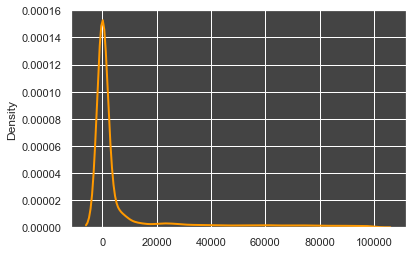

In [11]:
numerical = dataframe4.select_dtypes(include=np.number)
categorical = dataframe4.select_dtypes(include=np.object)

sns.set(rc={'axes.facecolor': '#444', 'figure.facecolor': '#fff'})
sns.distplot(numerical, hist=False, kde=True,
             bins=int(15), color='#f90',
             hist_kws={'edgecolor': '#222'},
             kde_kws={'linewidth': 2})

Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution

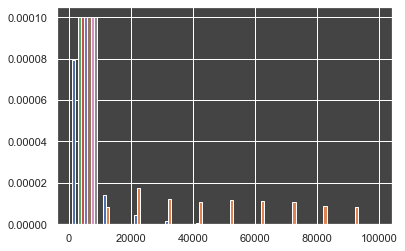

In [12]:
plt.hist(numerical, density=True)
plt.rcParams["figure.figsize"] = (9, 5)
plt.show()

In [15]:
dataFrame